# Day4 : 보다 쉽게 데이터 다루기(numpy, pandas)

## [워밍업 문제] : data/scientists.csv
- 과학자들의 평균 나이(Age)는 얼마일까요?
- 직업(Occupation)이 화학자(Chemist)인 과학자는 누구일까요?

In [7]:
import csv
f=open('./data/scientists.csv','r')
data=csv.reader(f)
next(data)
sumAge=0
aveAge=0.0
cnt=0
Chemist=[]
data=list(data)
for row in data :
    cnt+=1 #데이터 갯수 세기
    sumAge=sumAge+int(row[3])    #나이의 누적합
    if(row[-1]=='Chemist'):
        Chemist.append(row[0])
aveAge=sumAge/len(data)   
print("1.과학자들의 평균 나이 : ",aveAge)
print("2.직업(Occupation)이 화학자(Chemist)인 과학자 : ",Chemist)
f.close()

1.과학자들의 평균 나이 :  59.125
2.직업(Occupation)이 화학자(Chemist)인 과학자 :  ['Rosaline Franklin', 'Marie Curie']


# #1. numpy라이브러리

## 1. python 기본 코드 Vs. numpy 모듈 사용 코드

## 1-1. 0~50까지의 데이터 중 짝수만 발생시켜서 모두 저장하기

In [10]:
data=[]
for i in range(0,51,2) :
    data.append(i)
print(data)
print(type(data))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
<class 'list'>


In [11]:
import numpy as np
arr=np.arange(0,51,2)
print(data)
print(type(arr))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
<class 'numpy.ndarray'>


## 1-2. 주사위를 10번 굴려 숫자들의 발생 빈도 히스토그램 그리기

[4, 1, 1, 2, 4, 1, 3, 1, 6, 3]


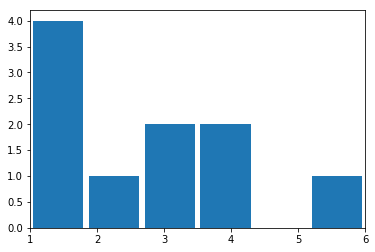

In [32]:
import matplotlib.pyplot as plt
import random
dice=[]
for i in range(10) :
    dice.append(random.randint(1,6))
print(dice)
plt.hist(dice,rwidth=0.9,bins=6)
plt.xlim(1,6)
plt.show()

[1 6 1 3 2 2 2 1 6 2]
<class 'numpy.ndarray'>


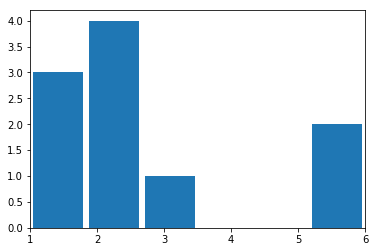

In [36]:
import matplotlib.pyplot as plt
import numpy as np
dice=np.random.choice(range(1,7),10)
print(dice)
plt.hist(dice,rwidth=0.9,bins=6)
plt.xlim(1,6)
plt.show()

## 2. numpy 배열 다루어 보기

## 2-1. 1차원 배열

In [45]:
import numpy as np
arr1=np.array([10,20,30,40]) #배열생성
arr2=np.array([1,2,3,4])
print(arr1+arr2) 
print(arr1-arr2)
print(arr1**arr2)

arr3=np.arange(5)#0~4까지 데이터 발생
print(arr3)
print("합계 : ", arr3.sum(),"평균 : ",arr3.mean())
arr4=np.arange(1,5)#1~4까지 데이터 발생
print(arr4)
print(arr4.cumsum()) #원소들의 누적합
print(arr4.cumprod()) #원소들의 누적곱

[11 22 33 44]
[ 9 18 27 36]
[     10     400   27000 2560000]
[0 1 2 3 4]
합계 :  10 평균 :  2.0
[1 2 3 4]
[ 1  3  6 10]
[ 1  2  6 24]


## 2-2. 다차원 배열

In [54]:
import numpy as np
arr1=np.array([[1,2,3],[4,5,6],[7,8,9]]) #3행 3열 배열
print(arr1)
arr2=np.arange(12).reshape(4,3) #0~12까지의 데이터 생성, 4행 3열 배열
print(arr2)
arr3=np.zeros(10) #10개의 원소가 모두 0인 배열
print(arr3)
arr4=np.ones((2,5)) #2행 5열의 원소가 모두 1인 배열
print(arr4)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


# #2. pandas라이브러리

## 1. pandas의 Series 

In [59]:
import pandas as pd
ser=pd.Series([10,20,30])
print(ser)
print('index=',ser.index)
print('values=',ser.values)

0    10
1    20
2    30
dtype: int64
index= RangeIndex(start=0, stop=3, step=1)
values= [10 20 30]


In [60]:
import pandas as pd
ser=pd.Series([10,20,30,40],['a','b','c','d'])
print(ser)
print('index=',ser.index)
print('values=',ser.values)

a    10
b    20
c    30
d    40
dtype: int64
index= Index(['a', 'b', 'c', 'd'], dtype='object')
values= [10 20 30 40]


## 2. Series 다루어 보기

### 1) 'scientists.csv' 파일 읽기 : read_csv()

In [62]:
import pandas as pd
scientists=pd.read_csv('./data/scientists.csv',sep=",") #파일 읽기
print(scientists)
print(type(scientists))

                   Name        Born        Died  Age          Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
5             John Snow  1813-03-15  1858-06-16   45           Physician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician
<class 'pandas.core.frame.DataFrame'>


### 2) 데이터프레임에서  행 단위 데이터 추출하기 
### - 데이터프레임명. loc[‘인덱스명’] 또는 데이터프레임명.iloc[행번호]

### 2-1) 행 단위 데이터 추출 : iloc속성

In [75]:
import pandas as pd
scientists=pd.read_csv('./data/scientists.csv',sep=",")
print(scientists)
rowData=scientists.iloc[3] #행번호가 3인 데이터 추출
print(type(rowData))
print(rowData)

                   Name        Born        Died  Age          Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
5             John Snow  1813-03-15  1858-06-16   45           Physician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician
<class 'pandas.core.series.Series'>
Name          Marie Curie
Born           1867-11-07
Died           1934-07-04
Age                    66
Occupation        Chemist
Name: 3, dtype: object


### 2-2) 행 단위 데이터 추출 : loc속성

In [73]:
import pandas as pd
scientists=pd.read_csv('./data/scientists.csv',sep=",")
print(scientists)
scientists=scientists.set_index('Name') #index를 'Name'로 변경
print(scientists)
rowData=scientists.loc['John Snow'] #index가 'John'인 데이터 추출
print(type(rowData))
print(rowData)

                   Name        Born        Died  Age          Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
5             John Snow  1813-03-15  1858-06-16   45           Physician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician
                            Born        Died  Age          Occupation
Name                                                                 
Rosaline Franklin     1920-07-25  1958-04-16   37             Chemist
William Gosset        1876-06-13  1937-10-16   61        Statistician
Florence Nightingale  1820-05-12  1910-08-13   90              

### 3) 데이터프레임에서  열 단위 데이터 추출하기 
### - 데이터프레임명. [‘컬럼명’]

In [76]:
import pandas as pd
scientists=pd.read_csv('./data/scientists.csv',sep=",")
colData=scientists['Occupation'] #컬럼이름이 'Occupation'인 열추출
print(type(colData))
print(colData)

<class 'pandas.core.series.Series'>
0               Chemist
1          Statistician
2                 Nurse
3               Chemist
4             Biologist
5             Physician
6    Computer Scientist
7         Mathematician
Name: Occupation, dtype: object


### 4) Series의 통계 메서드 사용하기 : 'Age'컬럼을 추출하여 나이가 가장 큰 값, 작은 값, 평균 값 출력하기

In [ ]:
import pandas as pd
scientists=pd.read_csv('./data/scientists.csv')
ages=scientists['Age']
print(ages)
print(type(ages))
print("나이가 가장 큰 값 : ",ages.max())
print("나이가 가장 작은 값 : ",ages.min())
print("나이의 평균 값 : ",ages.mean())

### 5) Series의 불린(Boolean) 추출 다뤄보기 :
### 평균 나이보다 많은 나이 추출하기

In [ ]:
import pandas as pd
scientists=pd.read_csv('./data/scientists.csv')
ages=scientists['Age']
print(ages[ages>ages.mean()])

### 6) Series의 브로드캐스팅
### 나이를 모두 5살 더 많게 하기 : 브로드캐스팅(Boardcasting) - 시리즈의 모든 데이터에 대해 한 번에 연산하는 것

In [ ]:
import pandas as pd
scientists=pd.read_csv('./data/scientists.csv')
ages=scientists['Age']
print(ages)
print(ages+5)
print(ages)

## 3. pandas의 DataFrame

In [ ]:
import pandas as pd

df=pd.DataFrame(
    [[1,10,100],[2,20,200],[3,30,300]],
    index=['r1','r2','r3'],
    columns=['c1','c2','c3']
)
print(type(df))
print(df)

## 4. 데이터 프레임 다루어 보기

### 1) 'gapminder.tsv' 파일 읽기 : read_csv()

In [77]:
import pandas as pd
df=pd.read_csv('./data/gapminder.tsv',delimiter='\t') #tsv(tab separrted value)
print(type(df))
print(df.head()) #처음 5개의 데이터만 보기
print(df.shape) #데이터의 (행,열)

<class 'pandas.core.frame.DataFrame'>
       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
(1704, 6)


### 2) 연도별 lifeExp의 평균 계산

In [78]:
import pandas as pd
df=pd.read_csv('./data/gapminder.tsv',delimiter='\t') #tsv(tab separrted value)
print(df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


### 3) 연도별, 대륙별 lifeExp,gdpPercap의 평균 계산

In [80]:
import pandas as pd
df=pd.read_csv('./data/gapminder.tsv',delimiter='\t') #tsv(tab separrted value)
print(df.groupby(['year','continent'])['lifeExp','gdpPercap'].mean())

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


### 4) 대륙별로 그룹화한 데이터 갯수 세기

In [79]:
import pandas as pd
df=pd.read_csv('./data/gapminder.tsv',delimiter='\t') #tsv(tab separrted value)
print(df.groupby('continent')['country'].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


## [실습1] 워밍업 문제를 pandas로 해결하기 : data/scientists.csv
- 과학자들의 평균 나이(Age)는 얼마일까요?
- 직업(Occupation)이 화학자(Chemist)인 과학자는 누구일까요?
- Alan Turing은 총 몇 일을 살았을까요?

In [81]:
import pandas as pd
df=pd.read_csv('./data/scientists.csv')
Chemist=df.loc[df.Occupation=='Chemist']
print("1.과학자들의 평균 나이 : ",df['Age'].mean())
print("2.직업(Occupation)이 화학자(Chemist)인 과학자 : ",Chemist['Name'].values)

1.과학자들의 평균 나이 :  59.125
2.직업(Occupation)이 화학자(Chemist)인 과학자 :  ['Rosaline Franklin' 'Marie Curie']


## [실습2] Day2의 실습을 pandas로 해결하기 

### 1)  [실습1] y=2*x**2 그래프 그리기

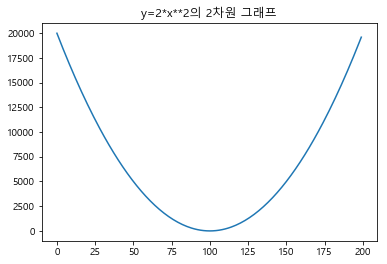

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family']='Malgun Gothic'
x=np.arange(-100,100) #-100~100까지 데이터로 배열 생성
y=pd.Series(2*x**2) #y=2*x**2
plt.rcParams['axes.unicode_minus']=False

g=y.plot()
g.set_title('y=2*x**2의 2차원 그래프') #차트 제목
plt.show()

### 2)[실습2] 키와 몸무게의 산점도 그래프

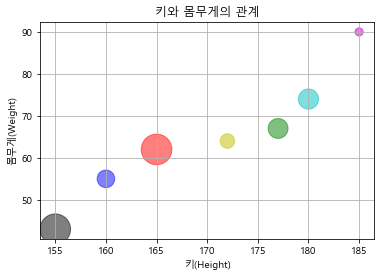

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('./data/height_weight.csv',encoding='euc-kr') #한글 인코딩 처리
dotSize=np.random.randint(1,1000,size=100) #1~1000사이를 랜덤으로 10개 발생
colors=['r','g','b','c','m','k','y']
plt.rcParams['font.family']='Malgun Gothic'
scatter_g=df.plot.scatter(x='키(Height)', y='몸무게(Weight)',s=dotSize,c=colors,alpha=0.5)
scatter_g.set_title('키와 몸무게의 관계') #차트제목
scatter_g.grid()
plt.show()

### 3) [실습3] 수학점수 히스토그램

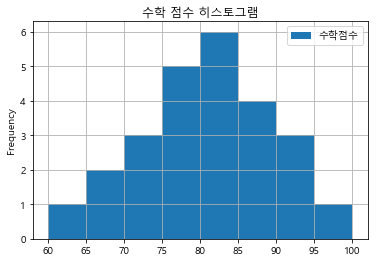

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('./data/math_score.csv',encoding='euc-kr')
math_hist=df.plot.hist(bins=8, grid=True)
math_hist.set_title('수학 점수 히스토그램')
plt.show()

### 4) [실습] 운동 시작 전과 후의 윗몸 일으키기 횟수 변화 막대 그래프

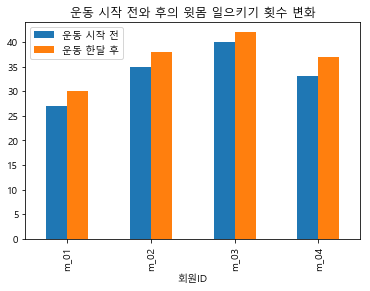

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('./data/exercise_result.csv',encoding='euc-kr',index_col='회원ID')
df.set_index='회원ID'
df_bar=df.plot.bar()
df_bar.set_title('운동 시작 전와 후의 윗몸 일으키기 횟수 변화')
plt.show()

# [Project] 서울 청소년의 스트레스 분석

## 1. 데이터 불러와서 저장하기

In [1]:
import pandas as pd
col_names=['스트레스','스트레스남학생','스트레스여학생','우울감경험','우울감남학생','우울감여학생','자살생각','자살생각남학생','자살생각여학생']
data=pd.read_excel('./data/teenage_mental.xls', header=1,usecols="C:K",names=col_names, encoding='euc-kr') #값을 data에 저장하기
print(data)
type(data)

   스트레스  스트레스남학생  스트레스여학생  우울감경험  우울감남학생  우울감여학생  자살생각  자살생각남학생  자살생각여학생
0  42.7     34.5     51.5   29.6    24.2    35.4  15.4     11.8     19.2


pandas.core.frame.DataFrame

## 2. 데이터에 아니오의 비율을 가진 행 추가하기

In [2]:
data.loc[1]=100-data.loc[0]
data

,스트레스,스트레스남학생,스트레스여학생,우울감경험,우울감남학생,우울감여학생,자살생각,자살생각남학생,자살생각여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


## 3. 인덱스를 '그렇다','아니다'로 바꾸기

In [3]:
data['응답']=['그렇다','아니다']
data

,스트레스,스트레스남학생,스트레스여학생,우울감경험,우울감남학생,우울감여학생,자살생각,자살생각남학생,자살생각여학생,응답
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2,그렇다
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8,아니다


In [5]:
data.set_index('응답',inplace=True)
data

,스트레스,스트레스남학생,스트레스여학생,우울감경험,우울감남학생,우울감여학생,자살생각,자살생각남학생,자살생각여학생
응답,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


## 4. 데이터를 시각적으로 표현하기

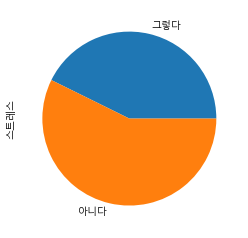

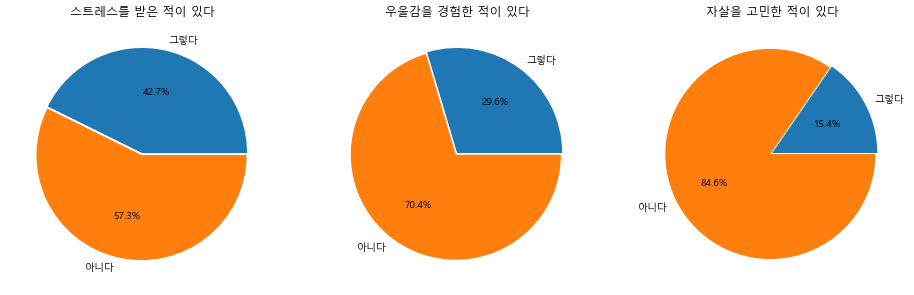

In [7]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic') 
data['스트레스'].plot.pie()
fig, axes=plt.subplots(1,3,figsize=(16,8)) #1행 3열로 plot을 배치
data['스트레스'].plot.pie(explode=[0,0.02],ax=axes[0],autopct='%1.1f%%')
axes[0].set_title('스트레스를 받은 적이 있다')
axes[0].set_ylabel('')

data['우울감경험'].plot.pie(explode=[0,0.02],ax=axes[1],autopct='%1.1f%%')
axes[1].set_title('우울감을 경험한 적이 있다')
axes[1].set_ylabel('')

data['자살생각'].plot.pie(explode=[0,0.02],ax=axes[2],autopct='%1.1f%%')
axes[2].set_title('자살을 고민한 적이 있다')
axes[2].set_ylabel('')
plt.show()